In [4]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [5]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [6]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.DIAG_HISTORICAL.value(),
    factors_selection=["spx"],
)

In [7]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [8]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:17<00:00, 15.83it/s]


StrategyStatistics:
* final_nav = 5.548281
* geom_avg_total_r = 0.094309
* geom_avg_xs_r = 0.086530
* std_xs_r = 0.151455
* min_xs_r = -0.081759
* max_xs_r = 0.099255
* skew = 0.086899
* kurtosis = 13.890951
* max_dd = -0.316695
* sharpe = 0.571325
* alpha_buy_hold = 0.016737
* tracking_error_buy_hold = 0.143909
* ir_buy_hold = 0.116303
* factor_loadings = {'low_risk': 0.6684860410543729, 'momentum': -0.09256998767350319, 'quality': -0.04301043471855104, 'size': 0.03324952962544536, 'value': -0.17561938581253456, 'spx': 0.7849921983271684}
* alpha_benchmark = 0.015591
* alpha_benchmark_pvalue = 0.342633
* tracking_error_benchmark = 0.080500
* ir_benchmark = 0.193674
* ttest_pval = 0.475664
* levene_pval = 0.000000
* timing_ability_coef = -0.011014
* timing_ability_pval = 0.496801

In [9]:
result.std_xs_r, result.sharpe

(0.1514549195116093, 0.5713249651110109)

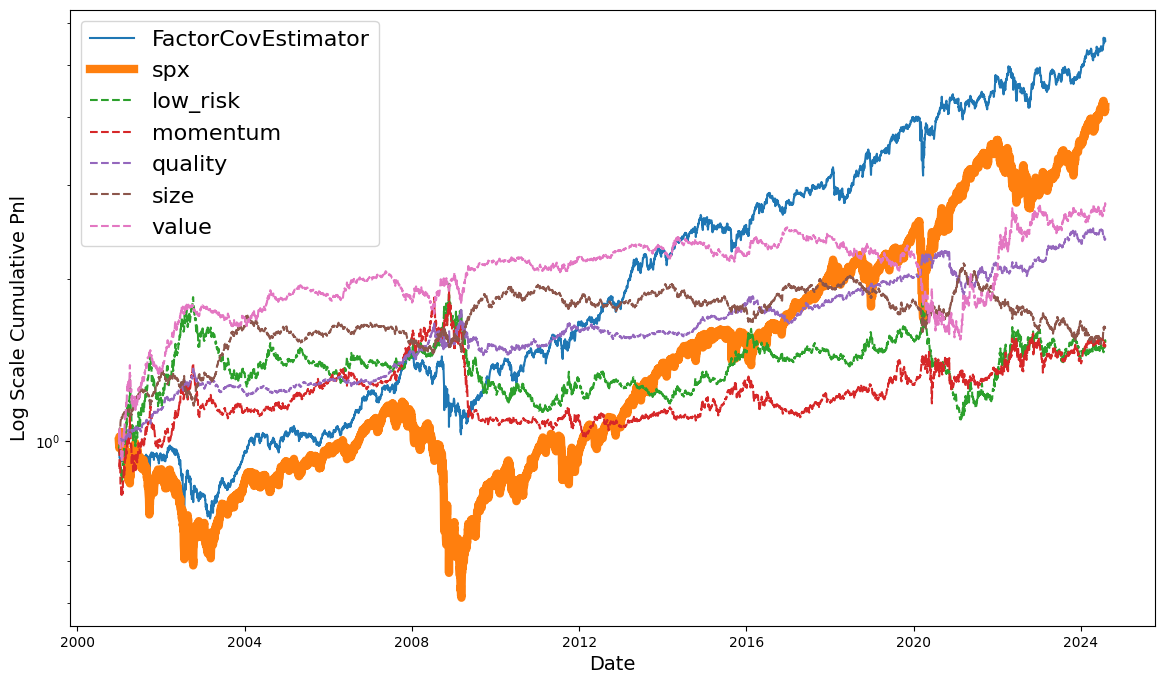

In [10]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

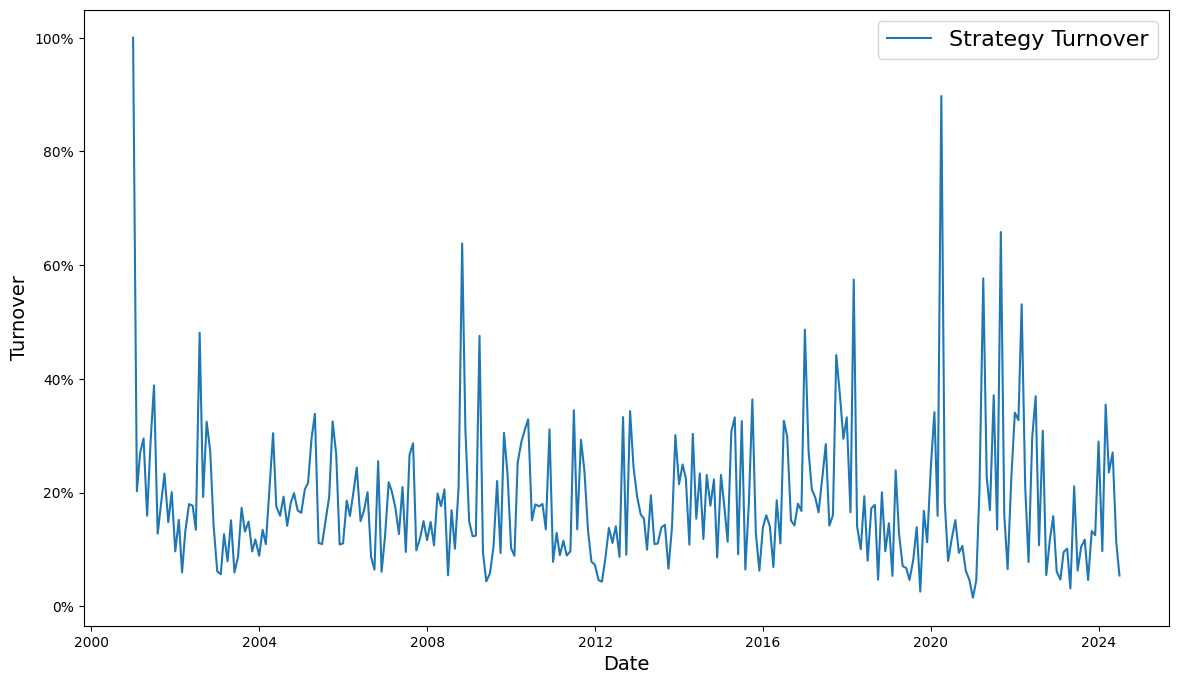

In [11]:
runner.plot_turnover()

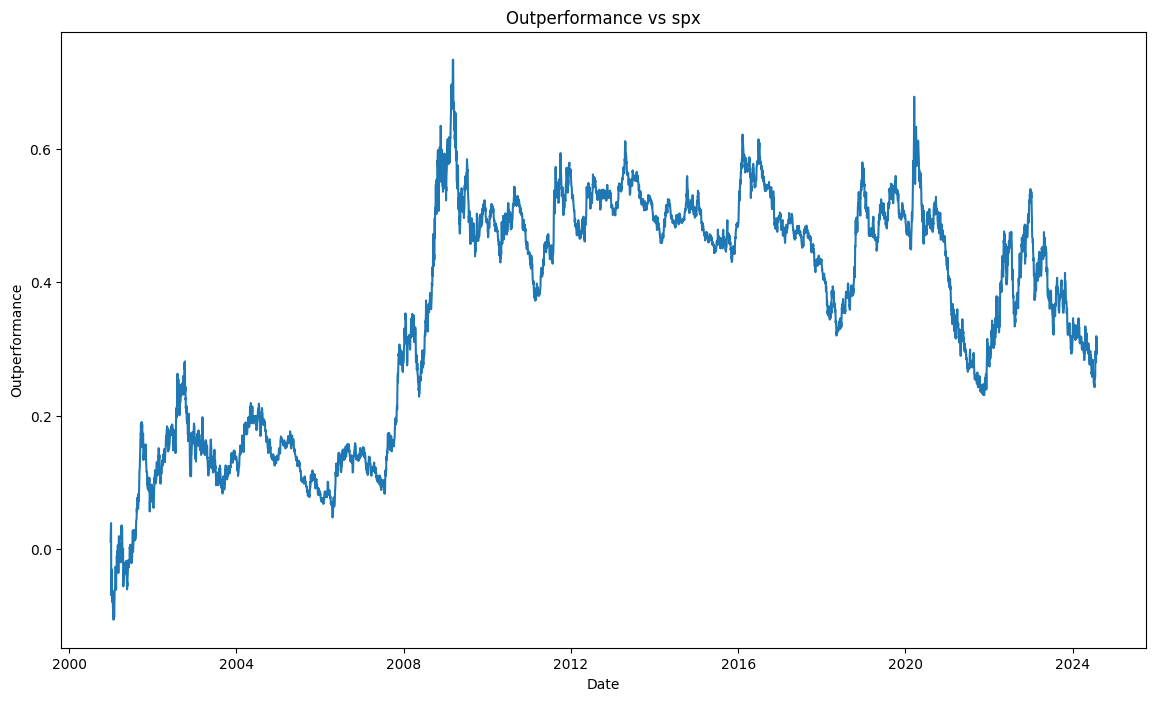

In [12]:
runner.plot_outperformance(mkt_only=True)

In [13]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")